<a href="https://colab.research.google.com/github/jiin124/Goyang_house_price_predict_BAproject/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%95%A9%EC%B9%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager,rc

font_path="/content/drive/MyDrive/NanumSquareB.ttf"
font=font_manager.FontProperties(fname=font_path)

In [ ]:
plt.rc('font',family='NanumBarunGothic')

In [ ]:
df=pd.read_csv('/content/Goyang.csv',encoding='cp949')
df.head()

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,배스킨,써브웨이,편의점개수
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,61,0,0,1,1,0,16
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,61,0,0,1,1,0,16
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,61,0,0,1,1,0,16
3,3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,61,0,0,1,1,0,16
4,4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,61,0,0,1,1,0,16


In [ ]:
floor=pd.read_csv('/content/고양시.csv',encoding='cp949')
floor

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,층,집 유형,거래금액(만원),Unnamed: 12
0,경기도,고양덕양구,고양동,84.93,2021,3,2007.0,읍내로 25,4128111600,17,아파트,"27,000",*주택의 전용면적은 연면적으로 기재
1,경기도,고양덕양구,고양동,59.99,2021,3,2007.0,읍내로 25,4128111600,4,아파트,"26,500",NaN
2,경기도,고양덕양구,고양동,84.93,2021,3,2007.0,읍내로 25,4128111600,10,아파트,"29,700",NaN
3,경기도,고양덕양구,고양동,59.99,2021,4,2007.0,읍내로 25,4128111600,4,아파트,"26,900",NaN
4,경기도,고양덕양구,고양동,84.93,2021,4,2007.0,읍내로 25,4128111600,2,아파트,"28,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,경기도,고양일산서구,탄현동,425.06,2021,3,1999.0,현중로26번길,4128710300,1,주택,"83,800",NaN
12382,경기도,고양일산서구,탄현동,253.61,2021,6,1996.0,현중로26번길,4128710300,1,주택,"70,000",NaN
12383,경기도,고양일산서구,탄현동,206.64,2021,5,1998.0,현중로26번길,4128710300,1,주택,"55,000",NaN
12384,경기도,고양일산서구,탄현동,206.64,2021,5,1998.0,현중로26번길,4128710300,1,주택,"55,000",NaN


In [ ]:
floor.columns

Index(['도', '구', '동', '전용면적(㎡)', '계약년', '계약월', '건축년도', '도로명', '시군구 코드', '층',
       '집 유형', '거래금액(만원)', 'Unnamed: 12'],
      dtype='object')

In [ ]:
df['층']=floor['층']
df.head(3)

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,배스킨,써브웨이,편의점개수,층
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,61,0,0,1,1,0,16,17
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,61,0,0,1,1,0,16,4
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,61,0,0,1,1,0,16,10


In [ ]:
df['집 유형']=floor['집 유형']
df.head(3)

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,배스킨,써브웨이,편의점개수,층,집 유형
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,61,0,0,1,1,0,16,17,아파트
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,61,0,0,1,1,0,16,4,아파트
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,61,0,0,1,1,0,16,10,아파트


In [ ]:
park=pd.read_csv('/content/고양시 학교, 공원 현황 (1).csv')

park.drop(['Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],axis=1,inplace=True)
park.head()

,Unnamed: 0,어린이집/유치원,초등학교,중학교,고등학교,공원 면적
0,가좌동,24,2,1,1,50155.0
1,강매동,3,0,0,0,0.0
2,고양동,28,2,1,1,35860.0
3,관산동,17,1,1,1,0.0
4,내유동,9,1,0,0,5660.0


In [ ]:
park.columns

Index(['Unnamed: 0', '어린이집/유치원', '초등학교', '중학교', '고등학교', '공원 면적', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [ ]:
lib=pd.read_csv('/content/고양시도서관+자동차+지하철.csv',encoding='cp949')
lib.head(3)

,시군구코드,주소정보,도서관,자동차,지하철역
0,4128110100,경기도 고양시 덕양구 주교동,1,16060,0
1,4128110200,경기도 고양시 덕양구 원당동,0,16060,0
2,4128110300,경기도 고양시 덕양구 신원동,1,16060,0


In [ ]:
li=pd.read_csv('/content/고양시도서관+자동차+지하철.csv',encoding='cp949')
li.head(3)

,시군구코드,주소정보,Unnamed: 2,Unnamed: 3,Unnamed: 4,도서관,자동차,지하철역
0,4128110100,경기도,고양시,덕양구,주교동,1,16060,0
1,4128110200,경기도,고양시,덕양구,원당동,0,16060,0
2,4128110300,경기도,고양시,덕양구,신원동,1,16060,0


## 유치원

In [ ]:

dictionary = dict(zip(list(park['Unnamed: 0']), list(park['어린이집/유치원'])))
print(dictionary)


{'가좌동': 24, '강매동': 3, '고양동': 28, '관산동': 17, '내유동': 9, '대자동': 3, '대장동': 4, '대화동': 49, '덕이동': 27, '도내동': 22, '동산동': 12, '마두동': 30, '문봉동': 1, '백석동': 37, '벽제동': 3, '사리현동': 8, '산황동': 1, '삼송동': 17, '성사동': 29, '성석동': 4, '식사동': 29, '신원동': 19, '오금동': 1, '용두동': 1, '원당동': 2, '원흥동': 14, '일산동': 84, '장항동': 12, '정발산동': 26, '주교동': 11, '주엽동': 60, '중산동': 45, '지축동': 5, '탄현동': 66, '토당동': 34, '풍동': 39, '행신동': 103, '행주내동': 1, '행주외동': 0, '향동동': 1, '현천동': 1, '화전동': 6, '화정동': 67}


In [ ]:
df['어린이집/유치원']=df['동'].map(dictionary)
df

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,...,학원개수,대형마트 개수,병원개수,스타벅스개수,배스킨,써브웨이,편의점개수,층,집 유형,어린이집/유치원
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,61,0,0,1,1,0,16,17,아파트,28.0
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,...,61,0,0,1,1,0,16,4,아파트,28.0
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,61,0,0,1,1,0,16,10,아파트,28.0
3,3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,...,61,0,0,1,1,0,16,4,아파트,28.0
4,4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,...,61,0,0,1,1,0,16,2,아파트,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,12381,경기도,고양일산서구,탄현동,425.06,2021,3,1999,현중로26번길,4128710300,...,150,1,1,2,1,1,29,1,주택,66.0
12382,12382,경기도,고양일산서구,탄현동,253.61,2021,6,1996,현중로26번길,4128710300,...,150,1,1,2,1,1,29,1,주택,66.0
12383,12383,경기도,고양일산서구,탄현동,206.64,2021,5,1998,현중로26번길,4128710300,...,150,1,1,2,1,1,29,1,주택,66.0
12384,12384,경기도,고양일산서구,탄현동,206.64,2021,5,1998,현중로26번길,4128710300,...,150,1,1,2,1,1,29,1,주택,66.0


## 초중고

In [ ]:
a=dict(zip(list(park['Unnamed: 0']), list(park['초등학교'])))
b=dict(zip(list(park['Unnamed: 0']), list(park['중학교'])))
c=dict(zip(list(park['Unnamed: 0']), list(park['고등학교'])))

In [ ]:
df['초등학교']=df['동'].map(a)
df['중학교']=df['동'].map(b)
df['고등학교']=df['동'].map(c)
df.head()

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,...,스타벅스개수,배스킨,써브웨이,편의점개수,층,집 유형,어린이집/유치원,초등학교,중학교,고등학교
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,1,1,0,16,17,아파트,28.0,2.0,1.0,1.0
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,...,1,1,0,16,4,아파트,28.0,2.0,1.0,1.0
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,1,1,0,16,10,아파트,28.0,2.0,1.0,1.0
3,3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,...,1,1,0,16,4,아파트,28.0,2.0,1.0,1.0
4,4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,...,1,1,0,16,2,아파트,28.0,2.0,1.0,1.0


## 공원면적 

In [ ]:
p=dict(zip(list(park['Unnamed: 0']), list(park['공원 면적'])))
df['공원면적']=df['동'].map(p)
df.head()

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,...,배스킨,써브웨이,편의점개수,층,집 유형,어린이집/유치원,초등학교,중학교,고등학교,공원면적
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,1,0,16,17,아파트,28.0,2.0,1.0,1.0,35860.0
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,...,1,0,16,4,아파트,28.0,2.0,1.0,1.0,35860.0
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,1,0,16,10,아파트,28.0,2.0,1.0,1.0,35860.0
3,3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,...,1,0,16,4,아파트,28.0,2.0,1.0,1.0,35860.0
4,4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,...,1,0,16,2,아파트,28.0,2.0,1.0,1.0,35860.0


## 도서관 등등 처리

In [ ]:
lib.head(3)

,시군구코드,주소정보,도서관,자동차,지하철역
0,4128110100,경기도 고양시 덕양구 주교동,1,16060,0
1,4128110200,경기도 고양시 덕양구 원당동,0,16060,0
2,4128110300,경기도 고양시 덕양구 신원동,1,16060,0


In [ ]:
lib['주소정보1']=lib['주소정보'].str.split(' ')


In [ ]:
lib.head(3)

,시군구코드,주소정보,도서관,자동차,지하철역,주소정보1
0,4128110100,경기도 고양시 덕양구 주교동,1,16060,0,"[경기도, 고양시, 덕양구, 주교동]"
1,4128110200,경기도 고양시 덕양구 원당동,0,16060,0,"[경기도, 고양시, 덕양구, 원당동]"
2,4128110300,경기도 고양시 덕양구 신원동,1,16060,0,"[경기도, 고양시, 덕양구, 신원동]"


In [ ]:
lib['법정동']=lib['주소정보1']
lib.head()

TypeError: ignored

In [ ]:
lib.drop('주소정소1',axis=1,inplace=True)

In [ ]:
lib['주소정보1'][[3]]

3    [경기도, 고양시, 덕양구, 원흥동]
Name: 주소정보1, dtype: object

In [ ]:
li.head()

,시군구코드,주소정보,Unnamed: 2,Unnamed: 3,Unnamed: 4,도서관,자동차,지하철역
0,4128110100,경기도,고양시,덕양구,주교동,1,16060,0
1,4128110200,경기도,고양시,덕양구,원당동,0,16060,0
2,4128110300,경기도,고양시,덕양구,신원동,1,16060,0
3,4128110400,경기도,고양시,덕양구,원흥동,0,16060,1
4,4128110500,경기도,고양시,덕양구,도내동,0,16060,0


In [ ]:
ll=dict(zip(list(li['Unnamed: 4']), list(li['도서관'])))
df['도서관']=df['동'].map(ll)
df.head()

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,초등학교,중학교,고등학교,공원면적,도서관
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,0,16,17,아파트,28.0,2.0,1.0,1.0,35860.0,3
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,...,0,16,4,아파트,28.0,2.0,1.0,1.0,35860.0,3
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,0,16,10,아파트,28.0,2.0,1.0,1.0,35860.0,3
3,3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,...,0,16,4,아파트,28.0,2.0,1.0,1.0,35860.0,3
4,4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,...,0,16,2,아파트,28.0,2.0,1.0,1.0,35860.0,3


In [ ]:
sub=dict(zip(list(li['Unnamed: 4']), list(li['지하철역'])))
df['지하철역개수']=df['동'].map(sub)
df.head()

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,...,편의점개수,층,집 유형,어린이집/유치원,초등학교,중학교,고등학교,공원면적,도서관,지하철역개수
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,16,17,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,...,16,4,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,16,10,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
3,3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,...,16,4,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
4,4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,...,16,2,아파트,28.0,2.0,1.0,1.0,35860.0,3,0


# 데이터 전처리

In [ ]:
df.head(3)

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,...,편의점개수,층,집 유형,어린이집/유치원,초등학교,중학교,고등학교,공원면적,도서관,지하철역개수
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,16,17,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,...,16,4,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,16,10,아파트,28.0,2.0,1.0,1.0,35860.0,3,0


In [ ]:
df.columns

Index(['Unnamed: 0', '도', '구', '동', '전용면적(㎡)', '계약년', '계약월', '건축년도', '도로명',
       '시군구 코드', '거래금액(만원)', '학원개수', '대형마트 개수', '병원개수', '스타벅스개수', '배스킨',
       '써브웨이', '편의점개수', '층', '집 유형', '어린이집/유치원', '초등학교', '중학교', '고등학교', '공원면적',
       '도서관', '지하철역개수'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),...,편의점개수,층,집 유형,어린이집/유치원,초등학교,중학교,고등학교,공원면적,도서관,지하철역개수
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,...,16,17,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,...,16,4,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,...,16,10,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,...,16,4,아파트,28.0,2.0,1.0,1.0,35860.0,3,0
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,...,16,2,아파트,28.0,2.0,1.0,1.0,35860.0,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   도         12386 non-null  object 
 1   구         12386 non-null  object 
 2   동         12386 non-null  object 
 3   전용면적(㎡)   12386 non-null  float64
 4   계약년       12386 non-null  int64  
 5   계약월       12386 non-null  int64  
 6   건축년도      12386 non-null  int64  
 7   도로명       12386 non-null  object 
 8   시군구 코드    12386 non-null  int64  
 9   거래금액(만원)  12386 non-null  int64  
 10  학원개수      12386 non-null  int64  
 11  대형마트 개수   12386 non-null  int64  
 12  병원개수      12386 non-null  int64  
 13  스타벅스개수    12386 non-null  int64  
 14  배스킨       12386 non-null  int64  
 15  써브웨이      12386 non-null  int64  
 16  편의점개수     12386 non-null  int64  
 17  층         12386 non-null  int64  
 18  집 유형      12386 non-null  object 
 19  어린이집/유치원  12386 non-null  float64
 20  초등학교      12386 non-null  fl

In [ ]:
df=df.fillna(0)

In [ ]:
df['어린이집/유치원']=df['어린이집/유치원'].astype('int')
df['초등학교']=df['초등학교'].astype('int')
df['고등학교']=df['고등학교'].astype('int')

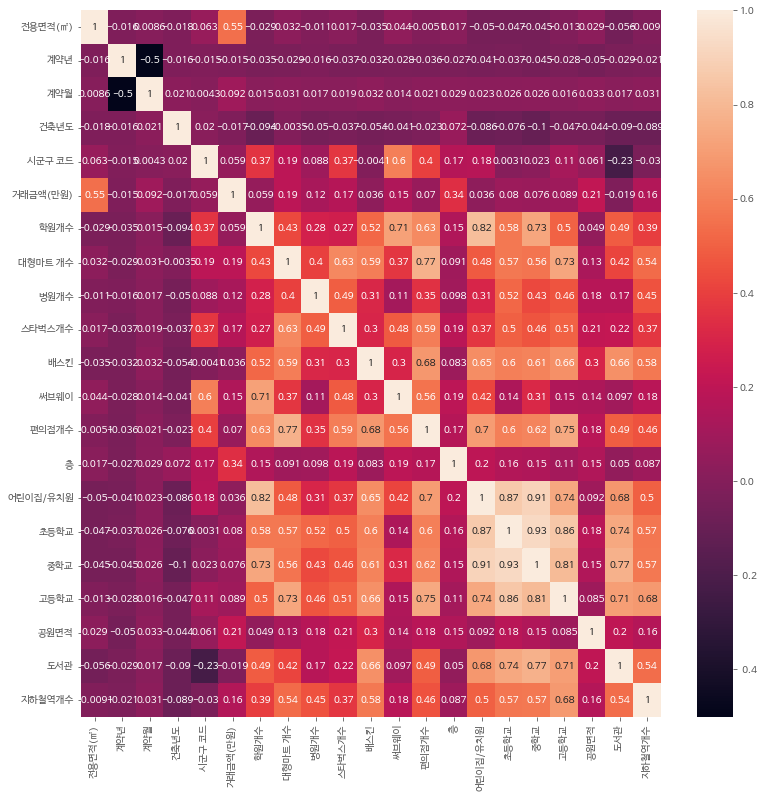

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.to_csv('goyangdf.csv')

In [ ]:
df['초/중/고']=df['초등학교']+df['중학교']+df['고등학교']
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),...,층,집 유형,어린이집/유치원,초등학교,중학교,고등학교,공원면적,도서관,지하철역개수,초/중/고
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,...,17,아파트,28,2,1.0,1,35860.0,3,0,4.0
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,...,4,아파트,28,2,1.0,1,35860.0,3,0,4.0
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,...,10,아파트,28,2,1.0,1,35860.0,3,0,4.0
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,...,4,아파트,28,2,1.0,1,35860.0,3,0,4.0
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,...,2,아파트,28,2,1.0,1,35860.0,3,0,4.0


In [ ]:
df.drop(['초등학교','중학교','고등학교'],axis=1,inplace=True)

In [ ]:
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),...,배스킨,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,...,1,0,16,17,아파트,28,35860.0,3,0,4.0
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,...,1,0,16,4,아파트,28,35860.0,3,0,4.0
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,...,1,0,16,10,아파트,28,35860.0,3,0,4.0
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,...,1,0,16,4,아파트,28,35860.0,3,0,4.0
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,...,1,0,16,2,아파트,28,35860.0,3,0,4.0


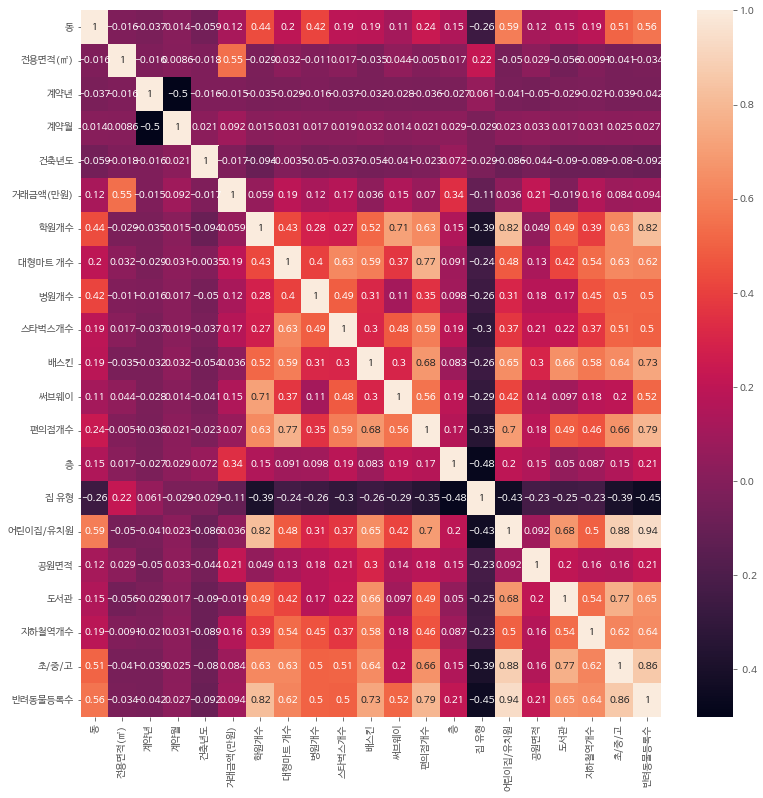

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.to_csv('goyangdf1.csv')

In [ ]:
dog=pd.read_csv('/content/경기도 고양시_반려동물 등록 현황_20210625.csv',encoding='cp949')
dog.head(3)

,시군명,읍면동명,등록동물수,(등록주체)시군구등록,(등록주체)대행업체등록,(등록주체)기타,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자
0,고양시,강매동,56,0,56,0,50,5,1,15,26,2.15,NaN,2021-06-25
1,고양시,고양동,1334,20,1313,1,836,396,102,56,1005,1.33,2.0,2021-06-25
2,고양시,관산동,941,10,931,0,536,334,71,53,697,1.35,1.0,2021-06-25


In [ ]:
animal=dict(zip(list(dog['읍면동명']), list(dog['등록동물수'])))
df['반려동물등록수']=df['동'].map(animal)
df.head()

,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,거래금액(만원),...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,27000,...,0,16,17,아파트,28,35860.0,3,0,4.0,1334
1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,26500,...,0,16,4,아파트,28,35860.0,3,0,4.0,1334
2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,29700,...,0,16,10,아파트,28,35860.0,3,0,4.0,1334
3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,26900,...,0,16,4,아파트,28,35860.0,3,0,4.0,1334
4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,28000,...,0,16,2,아파트,28,35860.0,3,0,4.0,1334


In [ ]:
df.to_csv('goyangdf1.csv')

In [ ]:
df.drop(['도','구','도로명','시군구 코드'],axis=1,inplace=True)

In [ ]:
df.head(3)

,동,전용면적(㎡),계약년,계약월,건축년도,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,고양동,84.93,2021,3,2007,27000,61,0,0,1,...,0,16,17,아파트,28,35860.0,3,0,4.0,1334
1,고양동,59.99,2021,3,2007,26500,61,0,0,1,...,0,16,4,아파트,28,35860.0,3,0,4.0,1334
2,고양동,84.93,2021,3,2007,29700,61,0,0,1,...,0,16,10,아파트,28,35860.0,3,0,4.0,1334


In [ ]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df['동']=la.fit_transform(df['동'])
df.head()


,동,전용면적(㎡),계약년,계약월,건축년도,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,2,84.93,2021,3,2007,27000,61,0,0,1,...,0,16,17,아파트,28,35860.0,3,0,4.0,1334
1,2,59.99,2021,3,2007,26500,61,0,0,1,...,0,16,4,아파트,28,35860.0,3,0,4.0,1334
2,2,84.93,2021,3,2007,29700,61,0,0,1,...,0,16,10,아파트,28,35860.0,3,0,4.0,1334
3,2,59.99,2021,4,2007,26900,61,0,0,1,...,0,16,4,아파트,28,35860.0,3,0,4.0,1334
4,2,84.93,2021,4,2007,28000,61,0,0,1,...,0,16,2,아파트,28,35860.0,3,0,4.0,1334


In [ ]:
d=pd.read_csv('/content/goyangdf1.csv')
d.head()

,Unnamed: 0,도,구,동,전용면적(㎡),계약년,계약월,건축년도,도로명,시군구 코드,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,0,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,0,16,17,아파트,28,35860.0,3,0,4.0,1334
1,1,경기도,고양덕양구,고양동,59.99,2021,3,2007,읍내로 25,4128111600,...,0,16,4,아파트,28,35860.0,3,0,4.0,1334
2,2,경기도,고양덕양구,고양동,84.93,2021,3,2007,읍내로 25,4128111600,...,0,16,10,아파트,28,35860.0,3,0,4.0,1334
3,3,경기도,고양덕양구,고양동,59.99,2021,4,2007,읍내로 25,4128111600,...,0,16,4,아파트,28,35860.0,3,0,4.0,1334
4,4,경기도,고양덕양구,고양동,84.93,2021,4,2007,읍내로 25,4128111600,...,0,16,2,아파트,28,35860.0,3,0,4.0,1334


In [ ]:
d['동'].value_counts()

일산동     1299
행신동     1198
탄현동     1007
주엽동      823
중산동      620
화정동      611
풍동       511
덕이동      507
대화동      476
관산동      452
백석동      435
고양동      431
내유동      382
마두동      378
주교동      373
식사동      338
성사동      331
토당동      290
가좌동      254
성석동      192
사리현동     182
도내동      164
장항동      157
정발산동     122
신원동      120
동산동      107
삼송동      105
원흥동       74
향동동       56
벽제동       51
문봉동       49
오금동       42
대장동       40
설문동       40
지축동       34
대자동       29
화전동       18
덕은동       15
구산동       13
현천동       11
용두동       10
행주내동       8
법곳동        8
행주외동       7
지영동        4
내곡동        3
효자동        2
강매동        2
선유동        2
산황동        2
원당동        1
Name: 동, dtype: int64

In [ ]:
df['동'].value_counts()

32    1299
43    1198
40    1007
36     823
37     620
49     611
42     511
11     507
9      476
3      452
16     435
2      431
6      382
14     378
35     373
26     338
24     331
41     290
0      254
25     192
19     182
12     164
33     157
34     122
27     120
13     107
21     105
31      74
46      56
18      51
15      49
28      42
8       40
23      40
39      34
7       29
48      18
10      15
4       13
47      11
29      10
44       8
17       8
45       7
38       4
5        3
50       2
1        2
22       2
20       2
30       1
Name: 동, dtype: int64

In [ ]:
d['집 유형'].value_counts()

아파트    8834
연립     3032
주택      520
Name: 집 유형, dtype: int64

In [ ]:
df['집 유형'].value_counts()

0    8834
1    3032
2     520
Name: 집 유형, dtype: int64

In [ ]:
print(la.inverse_transform())

TypeError: ignored

In [ ]:
b=LabelEncoder()
df['집 유형']=b.fit_transform(df['집 유형'])
df.head()

,동,전용면적(㎡),계약년,계약월,건축년도,거래금액(만원),학원개수,대형마트 개수,병원개수,스타벅스개수,...,써브웨이,편의점개수,층,집 유형,어린이집/유치원,공원면적,도서관,지하철역개수,초/중/고,반려동물등록수
0,2,84.93,2021,3,2007,27000,61,0,0,1,...,0,16,17,0,28,35860.0,3,0,4.0,1334
1,2,59.99,2021,3,2007,26500,61,0,0,1,...,0,16,4,0,28,35860.0,3,0,4.0,1334
2,2,84.93,2021,3,2007,29700,61,0,0,1,...,0,16,10,0,28,35860.0,3,0,4.0,1334
3,2,59.99,2021,4,2007,26900,61,0,0,1,...,0,16,4,0,28,35860.0,3,0,4.0,1334
4,2,84.93,2021,4,2007,28000,61,0,0,1,...,0,16,2,0,28,35860.0,3,0,4.0,1334


In [ ]:
df['집 유형'].value_counts()

0    8834
1    3032
2     520
Name: 집 유형, dtype: int64

In [ ]:
df.to_csv('Goyangdf.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   동         12386 non-null  int64  
 1   전용면적(㎡)   12386 non-null  float64
 2   계약년       12386 non-null  int64  
 3   계약월       12386 non-null  int64  
 4   건축년도      12386 non-null  int64  
 5   거래금액(만원)  12386 non-null  int64  
 6   학원개수      12386 non-null  int64  
 7   대형마트 개수   12386 non-null  int64  
 8   병원개수      12386 non-null  int64  
 9   스타벅스개수    12386 non-null  int64  
 10  배스킨       12386 non-null  int64  
 11  써브웨이      12386 non-null  int64  
 12  편의점개수     12386 non-null  int64  
 13  층         12386 non-null  int64  
 14  집 유형      12386 non-null  int64  
 15  어린이집/유치원  12386 non-null  int64  
 16  공원면적      12386 non-null  float64
 17  도서관       12386 non-null  int64  
 18  지하철역개수    12386 non-null  int64  
 19  초/중/고     12386 non-null  float64
 20  반려동물등록수   12386 non-null  in